# Certifciate Quality Classifier v5
## I will be learning using using K Means Clustering with this version
k-Means is an unsupervised algorithm that groups data into k clusters based on similarity.

k is number of clusters, for our experiment we will use 3 clusters called Approve, Needs Review and Reject. (grouping based on similarity)
let me walk through how to use it for our problem statement.
I will not do complex math in this session, I will try to do it another sample project, this time i will use python ML packages to directly calculate the K Means clusters

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

lets get our Wine dataset and create a data frame

In [11]:
wine_df = pd.read_csv('../ref_datasets/winequality-red.csv',sep=';')
X = wine_df[
    [
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol",
    ]
]

In [12]:
# Set the number of clusters (K) as 3 for our case
k = 3

# Initialize the KMeans model # n_init='auto' ensures best results across multiple runs
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

In [13]:
# Train the model (fit the data)
kmeans.fit(X)

# Predict the cluster label for each point in the dataset
cluster_labels = kmeans.predict(X)

# The cluster_labels array now contains 0, 1 or 2 for each point,  # indicating which of the 3 clusters it belongs to.
print("First 10 cluster assignments:", cluster_labels[:10])

First 10 cluster assignments: [0 1 1 1 0 0 1 0 0 2]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [14]:
# Get the coordinates of the final centroids
centroids = kmeans.cluster_centers_

print("\nFinal Centroids (Cluster Centers):")
print(centroids)


Final Centroids (Cluster Centers):
[[8.48842105e+00 5.19304094e-01 2.71029240e-01 2.36859649e+00
  8.46046784e-02 9.27485380e+00 2.32573099e+01 9.96637310e-01
  3.31007018e+00 6.47918129e-01 1.05828850e+01]
 [8.24682540e+00 5.20575397e-01 2.69087302e-01 2.49761905e+00
  9.18869048e-02 2.22331349e+01 5.62440476e+01 9.96849147e-01
  3.32313492e+00 6.78630952e-01 1.03502646e+01]
 [7.87125000e+00 5.73375000e-01 2.74750000e-01 3.23166667e+00
  8.83791667e-02 2.60354167e+01 1.08625000e+02 9.96921125e-01
  3.28958333e+00 6.51583333e-01 1.00060417e+01]]


In [20]:
label_map = {
    0: 'Approved',
    1: 'Needs Review',
    2: 'Reject'
}
wine_df['cluster_labels'] =pd.DataFrame(cluster_labels)
wine_df['Status_Label'] = wine_df['cluster_labels'].map(label_map)

In [21]:
wine_df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_labels,Status_Label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,Approved
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,Needs Review
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,Needs Review
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,Needs Review
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,Approved
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,Approved
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1,Needs Review
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0,Approved
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0,Approved
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,2,Reject


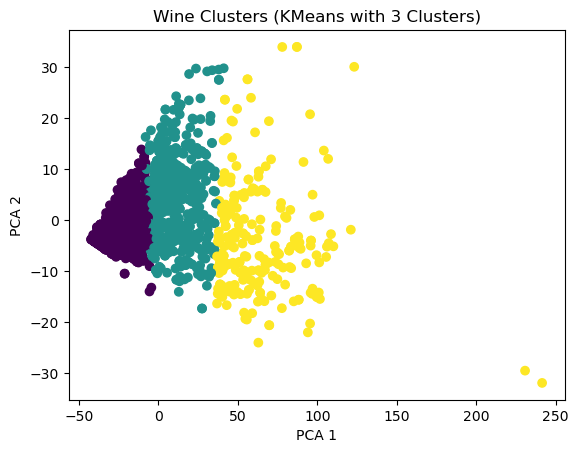

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Wine Clusters (KMeans with 3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

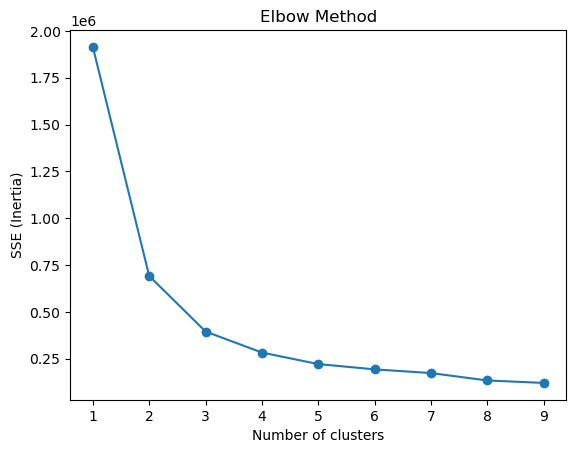

In [23]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X)
    sse.append(km.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.show()


In [24]:
wine_df['cluster_labels'] = cluster_labels
wine_df.groupby('cluster_labels')['quality'].mean()


cluster_labels
0    5.743860
1    5.613095
2    5.300000
Name: quality, dtype: float64